In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 248 images belonging to 4 classes.
Found 98 images belonging to 4 classes.
Found 55 images belonging to 4 classes.
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2772 - loss: 2.2273 - val_accuracy: 0.2449 - val_loss: 1.3213
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3652 - loss: 1.2840 - val_accuracy: 0.5000 - val_loss: 1.1144
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5699 - loss: 1.0826 - val_accuracy: 0.6122 - val_loss: 0.8625
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6483 - loss: 0.8746 - val_accuracy: 0.6224 - val_loss: 0.9244
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7263 - loss: 0.7827 - val_accuracy: 0.6735 - val_loss: 0.8003
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7418 - loss: 0.6998 - val_accuracy: 0.8061 - val_loss: 0.6820
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7694 - loss: 0.5786 - val_accuracy: 0.7653 - val_loss: 0.7494
Epoch 8/30


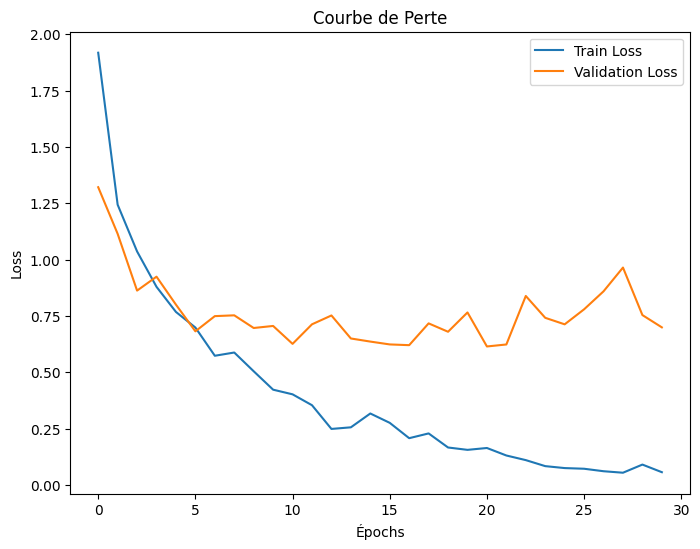

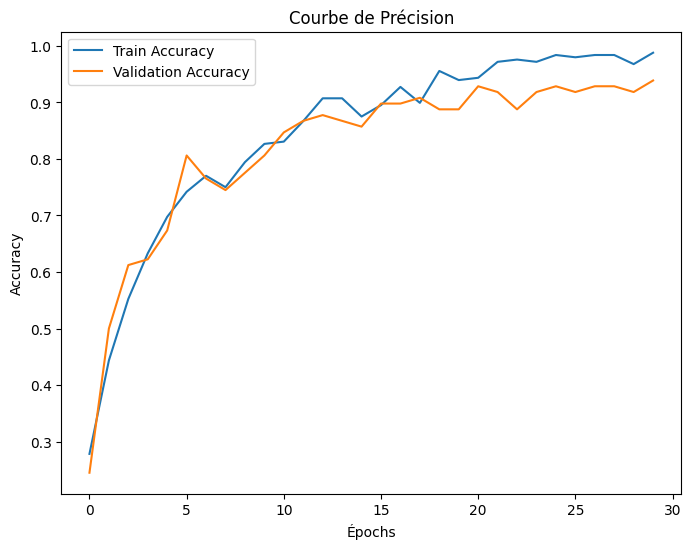

In [ ]:
# Importer les bibliothèques nécessaires
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# **Étape 1 : Chemins et configuration des données**
base_dir = '/content/drive/MyDrive/Prédiction_Blessures/data_image/datasets/data_images1'
train_dir = '/content/drive/MyDrive/Prédiction_Blessures/data_image/datasets/data_images1/train'
val_dir = '/content/drive/MyDrive/Prédiction_Blessures/data_image/datasets/data_images1/validation'
test_dir = '/content/drive/MyDrive/Prédiction_Blessures/data_image/datasets/data_images1/test'

# **Étape 2 : Fonction pour diviser les données**
def split_data(base_dir, train_dir, val_dir, test_dir, train_split=0.7, val_split=0.2, test_split=0.1):
    # Créer les dossiers de sortie s'ils n'existent pas
    for directory in [train_dir, val_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Parcourir chaque classe dans le dossier de base
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):  # Vérifier si c'est un dossier
            images = [img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]
            np.random.shuffle(images)  # Mélanger les fichiers

            # Calculer les indices pour train, validation et test
            train_count = int(train_split * len(images))
            val_count = int(val_split * len(images))

            # Copier les fichiers dans les dossiers appropriés
            for i, image in enumerate(images):
                src_path = os.path.join(class_path, image)
                if i < train_count:
                    dest_dir = os.path.join(train_dir, class_name)
                elif i < train_count + val_count:
                    dest_dir = os.path.join(val_dir, class_name)
                else:
                    dest_dir = os.path.join(test_dir, class_name)

                if not os.path.exists(dest_dir):
                    os.makedirs(dest_dir)

                shutil.copy(src_path, dest_dir)  # Copier uniquement les fichiers

# Diviser les données
split_data(base_dir, train_dir, val_dir, test_dir)

# **Étape 3 : Préparer les données avec ImageDataGenerator**
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# **Étape 4 : Construire le modèle CNN**
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Étape 5 : Entraîner le modèle**
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

# **Étape 6 : Évaluer le modèle**
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy:.2f}")
print(f"Accuracy sur l'ensemble de validation : {val_accuracy:.2f}")

# **Étape 7 : Visualiser les performances**
import matplotlib.pyplot as plt

# Courbes de perte
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de Perte')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Courbes de précision
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de Précision')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# **Étape 8 : Sauvegarder le modèle**
model_save_path = '/content/drive/MyDrive/Prédiction_Blessures/modele_tab/modelcnn.h5'
model.save(model_save_path)
print(f"Modèle sauvegardé à l'emplacement : {model_save_path}")


Modèle sauvegardé à l'emplacement : /content/drive/MyDrive/Prédiction_Blessures/modele_tab/modelcnn.h5
